# Lab 1: Algorithmic Decision Making 1

The purpose of this assignment is for you to gain experience with basic methods for training, evaluating, and critiquing machine learning models
using some of the most common Python machine learning libraries:
 - [Matplotlib](https://matplotlib.org/)
 - [NumPy](https://numpy.org/)
 - [Pandas](https://pandas.pydata.org/)
 - [scikit-learn](https://scikit-learn.org/stable/index.html)

This assignment is intended to be done collaboratively.  You will work as a group to complete the coding and written portions of this assignment.  However, **each group member will submit a copy of the code** via the autograder and **the group will jointly submit one version of the written portion** of the assignment via Canvas.

## Part 0: Reading the Readme

Before continuing with this notebook, first make sure to thoroughly read the `README.md` file at the base of this repository.
The readme file contains useful information that you will use throughout all of your assignments.
Refer back to this file whenever you have questions in this or future assignments.

If you need more help with machine learning basics,
we recommend seeing if there is a corresponding module in Google's [Introduction to Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/ml-intro).

## Part 1: Loading Data

First, we will import modules that will let us do lots quickly.
We'll import some powerful tools for importing and working with data, especially `pandas`.

Pandas has been in development since 2008, largely through the efforts of one developer.
For more on the history see [here](https://en.wikipedia.org/wiki/Pandas_(software).

[Matplotlib](https://matplotlib.org/) is a plotting library for Python built upon the concepts and semantics of [MATLAB](https://en.wikipedia.org/wiki/MATLAB),
hence the name Matplotlib ("MATlab PLOTting LIBrary").
Matplotlib is one of the most popular Python plotting libraries
(with one of the others being [seaborn](https://seaborn.pydata.org/)).
Although for simple plots (like histograms),
you can sometimes get away with using [simpler methods](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html).

[NumPy](https://numpy.org/) is a scientific computing package for Python that is ubiquitous in the data science / machine learning community.
The most commonly used feature of NumPy is its [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)
(N-dimensional array),
which is an array that can exist in more than one dimension.
In 1-dimension an ndarray is like a list,
in 2-dimensions an ndarray is like a grid,
in 3-dimensions an ndarray is like a cube,
and in 4-dimensions and up an ndarray is like a hypercube.
You can use the `shape` attribute to see the dimensions of an ndarray.

Throughout this course, we will be using the [Pandas library](https://pandas.pydata.org/) to manipulate data.
This library is very large and can be quite complex,
so if you want additional information or practice
we recommend the official [Pandas Tutorial](https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html).
Throughout this course, you will be heavily using [Pandas DataFrames](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)
(a DataFrame is also frequently just called a "frame").

scikit-learn is a large library that contains tools for classification, regression, clustering, feature selection, evaluation, and preprocessing.
We will also refer to "scikit-learn" as "sklearn".
Since Python doesn't like package names with a dash, `sklearn` is what you use to import the library in Python.
It uses a fairly consistent API that lets you swap out components without needing the change your entire infrastructure,
e.g., you can swap out the type of classifier you use without needing to change the rest of your code.
It is so ubiquitous in machine learning that other machine learning libraries will often use the same terminology and methods (which we will discuss later).
If you need instruction on scikit-learn, we recommend this [text tutorial](https://scikit-learn.org/stable/getting_started.html)
and this [video tutorial](https://www.youtube.com/watch?v=0B5eIE_1vpU).
sklearn also has a very complete [user guide](https://scikit-learn.org/stable/user_guide.html)
and many curated [examples](https://scikit-learn.org/stable/auto_examples/index.html).

In [1]:
# Import all libraries we will need.
# It is good style to make all your imports in the first cell of the notebook.

import random
import warnings

import matplotlib.pyplot
import numpy
import pandas
import sklearn.base
import sklearn.datasets
import sklearn.exceptions
import sklearn.linear_model
import sklearn.metrics
import sklearn.tree

# Set a global seed in case we need some randomness.
random.seed(146)

# We are going to ignore a specific warning from scikit-learn.
# In real-world code you would confront this warning with better data munging and hyperparameter tweaking,
# but those are not the focus of this course.
warnings.simplefilter("ignore", category = sklearn.exceptions.ConvergenceWarning)

The data we are using for this lab is from the ["Communities and Crime" dataset](https://archive.ics.uci.edu/dataset/183/communities+and+crime)
available at [UC Irvine's Machine Learning Repository](https://archive.ics.uci.edu/datasets).
It includes data about the crime rates in various communities,
including information about the socioeconomic, racial, and policing status in each community.

We can easily load this data using the [`pandas.read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function.

In [2]:
communities_data = pandas.read_csv("communities.csv")

# The last value in an iPython code cell will get output.
communities_data

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.0
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.00,0.00,0.00,0.0,0.00,0.00,1.0
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.00,0.00,0.00,0.0,0.00,0.00,1.0
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.00,0.00,0.00,0.0,0.00,0.00,0.0
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.00,0.00,0.00,0.0,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,0.00,0.00,0.00,0.0,0.00,0.00,0.0
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,0.00,0.00,0.00,0.0,0.00,0.00,1.0
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.28,0.0
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.18,0.0


We can also see more specific stats about a DataFrame using the 
[DataFrame.info()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html)
and [DataFrame.describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) methods.

The [DataFrame.info()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) method gives us high-level information about the frame itself.

In [3]:
communities_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Columns: 123 entries, population to ViolentCrimesPerPop
dtypes: float64(123)
memory usage: 1.9 MB


Whereas the [DataFrame.describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)
gives us information all all **numeric** columns in the frame.

In [4]:
communities_data.describe()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,0.336264,0.423164,...,0.065231,0.232854,0.161685,0.026093,0.012272,0.111760,0.070461,0.094052,0.031209,0.292377
std,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,0.166505,0.179185,...,0.109459,0.203092,0.229055,0.104581,0.062672,0.270038,0.228819,0.240328,0.097190,0.454969
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,0.250000,0.300000,...,0.020000,0.100000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,0.290000,0.420000,...,0.040000,0.170000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,0.360000,0.530000,...,0.070000,0.280000,0.190000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h3 style="color: green; font-size: x-large";>♦ Group Break</h3>

Take a moment to examine the data with your group.
Read the [description of the dataset](https://archive.ics.uci.edu/dataset/183/communities+and+crime)
and make sure you can match what you read on the webpage with what you see in the actual data.

Some potential things to discuss with your group:
 - Are there any flaws in the collection methodology for this dataset?
 - Does this data contain any biasses?
 - How could this data be ethically used?
 - How could this data be unethically used?

## Part 2: Features and Labels

The first step when working with data (after loading it) is to define the features ($ X $) and labels ($ Y $).

[Features](https://en.wikipedia.org/wiki/Feature_(machine_learning)) are the meaningful numbers that we associate with a data point.
Our communities dataset has 123 columns, 122 of those are features.
Some of the features in our dataset include `population`, `householdsize`, and `PolicCars`.
Features are collectively referred to using the $ X $ variable,
with specific instances represented with $ x $.
Our machine learning models can have anywhere from a few to trillions of features.
(Technically with the type of machine learning we will discuss in this class, models can have any finite number of features.)

A label is the target of our predictive model.
A label can be just about anything,
but the most common types of labels are
binary/boolean values (e.g., `true`/`false`, `yes`/`no`, `1`/`0`),
members of a specified class (e.g., `dog` and `cat` can be valid labels for the `animal` class),
or continuous values (often between 0.0 and 1.0).
Features are collectively referred to using the $ Y $ variable,
with specific instances represented with $ y $.

In our dataset, the `ViolentCrimesPerPop` column is our label.
If we take a look at this column, we can see that it is a float.

In [5]:
communities_data['ViolentCrimesPerPop'].describe()

count    1994.000000
mean        0.292377
std         0.454969
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: ViolentCrimesPerPop, dtype: float64

However if we look even closer,
we can see that there are only two values here: 0.0 and 1.0.

In [6]:
communities_data['ViolentCrimesPerPop'].unique()

array([0., 1.])

So even through the column is continuous,
the label is actually binary.
Where 1.0 represents a high rate of violent crime in the community,
and 0.0 represents a low rate of violent crime in the community.

Before we work more with our data, we are going to shuffle it.
It is almost always a good idea to shuffle your data before working with it in machine learning to avoid seeing patterns that are not representative of the entire dataset.

In [7]:
communities_data = communities_data.sample(frac = 1, ignore_index = True, random_state = 146)
communities_data

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.04,0.34,0.02,0.94,0.04,0.01,0.49,0.55,0.39,0.44,...,0.04,0.22,0.02,0.00,0.0,0.00,0.0,0.00,0.00,0.0
1,0.05,0.32,0.04,0.94,0.06,0.03,0.37,0.52,0.33,0.42,...,0.04,0.27,0.10,0.00,0.0,0.00,0.0,0.00,0.00,0.0
2,0.25,0.37,0.40,0.62,0.13,0.05,0.57,0.66,0.55,0.46,...,0.07,0.55,0.61,0.14,0.1,0.45,0.0,0.78,0.27,1.0
3,0.04,0.53,0.36,0.68,0.11,0.05,0.54,0.52,0.48,0.57,...,0.04,0.19,0.13,0.00,0.0,0.00,0.0,0.00,0.00,0.0
4,0.01,0.39,0.02,0.96,0.05,0.02,0.53,0.69,0.66,0.35,...,0.04,0.09,0.06,0.00,0.0,0.00,0.0,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.10,0.78,0.40,0.36,0.22,0.58,0.50,0.53,0.31,0.19,...,0.06,0.28,0.05,0.00,0.0,0.00,0.0,0.00,0.00,1.0
1990,0.00,0.44,0.00,0.99,0.03,0.00,0.40,0.47,0.29,0.28,...,0.02,0.15,0.01,0.00,0.0,0.00,0.0,0.00,0.00,0.0
1991,0.07,0.44,0.33,0.54,0.09,0.37,0.49,0.69,0.53,0.29,...,0.09,0.14,0.05,0.00,0.0,0.00,0.0,0.00,0.00,1.0
1992,0.05,0.54,0.74,0.40,0.05,0.01,0.61,0.68,0.57,0.39,...,0.07,0.15,0.01,0.00,0.0,0.00,0.0,0.00,0.00,1.0


The data should show up in a different order than it did before.
Also note that we set the seed (`random_state`) for our shuffle.
So technically, this notebook will always give the same order.
That may seem to defeat the purpose of shuffling, but we do it for educational purposes.
It would be really hard to write an assignment without knowing what the data looks like.
In a real-world setting, you would set the random seed at the beginning of your process and print the seed just in case you need it later.

<h3 style="color: darkorange; font-size: x-large";>★ Task 2.A</h3>

Complete the function below that takes in a dataset as a Pandas DataFrame and the name of the label column,
and return the features (as a [Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html))
and labels (as a [Pandas Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)).
The original DataFrame passed into the function should not be modified,
and the returned features should not contain the label column.

In [8]:
def slice_labels(frame, label_column_name):
    """
    Take in a dataset as a Pandas DataFrame and the name of the label column,
    and return the features (as a DataFrame) and labels (as a Series).
    
    Returns:
        A copy of the passed in frame without the label column.
        A copy of the label column as a Pandas Series.
    """
    
    # tmp_DataFrame = pandas.DataFrame(frame.loc[:, frame.columns != label_column_name]).copy()
    tmp_DataFrame = ((pandas.DataFrame(frame)).copy()).drop(columns = [label_column_name])

    tmp_Series = pandas.Series(frame[label_column_name])
    
    return tmp_DataFrame, tmp_Series
    # return NotImplemented, NotImplemented

communities_features, communities_labels = slice_labels(communities_data, 'ViolentCrimesPerPop')
if (communities_features is NotImplemented):
    print("Using fake data!")
    
    # This notebook will use fake data until you implement the above function.
    communities_features, communities_labels = sklearn.datasets.make_classification(
            n_samples = 2000, n_features = len(communities_data.columns) - 1, random_state = 146)

    # Convert the fake data from numpy to pandas.
    communities_features = pandas.DataFrame(communities_features)
    communities_labels = pandas.Series(communities_labels).astype(numpy.float64)

print("Features have %d rows and %d columns." % (len(communities_features), len(communities_features.columns)))

print("First 10 rows of features (only first 5 columns):")
print(communities_features[communities_features.columns[:5]].head(10))

print("First 10 labels:")
communities_labels.head(10)

Features have 1994 rows and 122 columns.
First 10 rows of features (only first 5 columns):
   population  householdsize  racepctblack  racePctWhite  racePctAsian
0        0.04           0.34          0.02          0.94          0.04
1        0.05           0.32          0.04          0.94          0.06
2        0.25           0.37          0.40          0.62          0.13
3        0.04           0.53          0.36          0.68          0.11
4        0.01           0.39          0.02          0.96          0.05
5        0.13           0.55          0.05          0.78          0.14
6        0.01           0.76          0.01          0.44          0.15
7        0.03           0.42          0.47          0.62          0.01
8        0.05           0.60          0.05          0.94          0.06
9        0.02           0.35          0.11          0.90          0.03
First 10 labels:


0    0.0
1    0.0
2    1.0
3    0.0
4    0.0
5    0.0
6    1.0
7    0.0
8    0.0
9    1.0
Name: ViolentCrimesPerPop, dtype: float64

Now that we have our data as features and labels, it is time to **split** our data.
Before we jump into the details of splitting data, let's imagine a situation that shows why we need to split up our data.
Imagine we make a classifier that just remembers every single data point it has ever seen.
So on `fit()`, all it does is store each data point along with its label.
Then when it comes time to predict, the classifier will just look to see if it has seen the point before.
If it has seen the point it returns the real label,
and if it has not seen the point it returns a random label.

If we train this classifier with `communities_features` like we have with the classifiers we have been working with earlier in this assignment,
then this classifier will always score 100% (since it has seen every single point).
But as soon as we ask the classifier to predict on new data,
it will just give random predictions.
So in testing it will do perfect, but in the real world it will perform poorly.

In this case it is easy to see that our classifier will never work in the real world,
but it is easy to [unintentionally make models that memorize data points](https://bair.berkeley.edu/blog/2019/08/13/memorization/)
(especially if you are using neural networks).
So to help avoid this, we split our data into multiple non-overlapping parts: [train and test](https://en.wikipedia.org/wiki/Training,_validation,_and_test_data_sets).
The *train dataset* (also called "train set", "train split", or just "train") is the data that we will use to train/fit our models.
We can also compute our evaluation metrics (e.g. accuracy) on our train split,
but the resulting score is just used for debugging purposes.
The *test dataset* (also called "test set", "test split", or just "test") is the data that we will officially compute our evaluation metrics on.
The test set should never be used for any training purposes and should remain secret until your model is ready to be evaluated.
It is considered cheating if information "leaks" between the two data splits.

<center><img src="predictive_models.png" width="500px"/></center>
<center style='font-size: small'>Comic courtesy of <a href='https://xkcd.com/2169/'>xkcd</a>.</center>
<center style='font-size: small'>When you don't split your data properly, you may unknowingly leak information.</center>

Sometimes, you may even need a third split of data.
This third split is called the *validation dataset* (also called "validation set", "validation split", or just "validation").
We won't be going into the details of what the validation split is used for,
but (if it exists) it is generally the same size as the test split and used to train [hyperparameters](https://en.wikipedia.org/wiki/Hyperparameter).
Hyperparameters are options that are at a higher level than normal model parameters
(like the option of which machine learning model to use).

There is no exact number or percent that decides how much of your data should be in train vs test.
It just depends on your domain and how much data you have available.
If there are no special circumstances, putting aside 10% - 25% of your data for testing typically works well.

sklearn has a very simple function available that will split data for you:
[sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
If you have more complex data, splitting by hand should is fairly straightforward
(just make sure you don't skip data points or double include them in both splits).

<h3 style="color: darkorange; font-size: x-large";>★ Task 2.B</h3>

Complete the function below that splits the passed in dataset (created by `slice_labels()`) into training and test data with the specified size.
You may assume that the specified size will always be smaller than the size of the dataset.
The returned collections should be DataFrames for features and Series for labels (as in `slice_labels()`).

Note: `split_data()` should not change the ordering of the features and labels (for testing purposes).

In [9]:
import sklearn.model_selection


def split_data(features, labels, num_train):
    """
    Split the incoming dataset into train and test portions that preserve the original orderings of features and labels.
    
    Returns:
        X_train - The first num_train rows of X (features).
        X_test - The remaining rows of X (features).
        Y_train - The first num_train rows of Y (labels).
        Y_test - The remaining rows of Y (labels).
    """
    X_train = features.iloc[: num_train, :]
    X_test = features.iloc[num_train :, :]
    Y_train = labels.iloc[: num_train]
    Y_test = labels.iloc[num_train :]

    # X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(features, labels, train_size = num_train)

    return X_train, X_test, Y_train, Y_test

    # return NotImplemented, NotImplemented, NotImplemented, NotImplemented
    
communities_features_train, communities_features_test, communities_labels_train, communities_labels_test = split_data(communities_features, communities_labels, 1000)

# Use dummy data if the above function is not yet implemented.
if (communities_features_train is NotImplemented):
    print("Using fake splits!")
    communities_features_train = communities_features
    communities_features_test = communities_features
    communities_labels_train = communities_labels
    communities_labels_test = communities_labels

print("Num Train Features: %d" % (len(communities_features_train)))
print("Num Train Labels: %d" % (len(communities_labels_train)))
print("Num Test Features: %d" % (len(communities_features_test)))
print("Num Test Labels: %d" % (len(communities_labels_test)))

Num Train Features: 1000
Num Train Labels: 1000
Num Test Features: 994
Num Test Labels: 994


<h3 style="color: green; font-size: x-large";>♦ Group Break</h3>

Take a moment to discuss the data and splitting process with your group.

Some potential things to discuss with your group:
 - Why did we shuffle the data?
     - Does shuffling affect our splits?
     - Can we just shuffle after splitting?
 - Our label, `ViolentCrimesPerPop`, is a binary value that represents whether or not there is "a high rate of violent crime in the community".
     - Where is the cutoff?
     - Who determines what a "high rate" is?
     - Could the choice of threshold for determining a "high rate" be made in an unethical way?

## Part 3: Training/Fitting a Model

scikit-learn (`sklearn`) is probably the most popular machine learning library for Python.
Therefore, it's the go-to choice for us to use in the course.
Since the focus of this course is not on the technical practice of machine learning,
we will not be going into details on every step in the implementation of a model
(as those are covered in the recommended course requirements for this course).
However, here are some scikit-learn resources if you need an introduction or refresher:
 - [scikit-learn Homepage](https://scikit-learn.org/stable/index.html)
 - [API Documentation](https://scikit-learn.org/stable/modules/classes.html)
 - [Official User Guide](https://scikit-learn.org/stable/user_guide.html)
 - [Official Examples](https://scikit-learn.org/stable/auto_examples/index.html)
 - [Recommended Text Tutorial](https://scikit-learn.org/stable/getting_started.html)
 - [Recommended Video Tutorial](https://www.youtube.com/watch?v=0B5eIE_1vpU)

Training is one of the core parts of the machine learning pipeline and is when we adjust our machine learning model based on our training data.
You can say that this is the actual "learning" part of machine learning.
("Learning" is in quotes here because machine learning is **VERY** different from the how humans learn and pretty much any biological or physiological concept of learning.
A better name for machine learning is probably something like "computerized pattern recognition" (*this name is only Eriq's opinion*).)
In training (also called "fitting"), we give our machine learning model access to our training set so it can find patterns in the data.
Once our model is trained/fitted, then it should be able to make predictions on data it has not seen before.

In this assignment, we will be using two orthogonal machine learning algorithms:
[Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression)
and [Decision Trees](https://en.wikipedia.org/wiki/Decision_tree_learning).
Although both are supervised machine learning techniques,
they learn patterns in the data in very different ways.
Logistic Regression fits a single continuous function to the data and uses training to tweak the parameters of that function.
Whereas Decision Trees builds a structure called a "decision tree" so sort the data into different bins.
(Note that here we are collectively discussing a family of techniques for generating decision trees,
but in practice we will need to choose a specific algorithm (or let scikit-learn choose one for us).)

Before we train our own models, we are going to define a dummy model.
This will only be used in case you have not yet implemented different parts of this assignment.
You can totally ignore this (or look at it, your choice).

In [10]:
# You can ignore this, it is just a dummy classifier/model.
class DummyClassifier(sklearn.base.BaseEstimator):
    def __init__(self, choices = [0, 1]):
        self._choices = choices.copy()

    def fit(self, train_features, train_labels):
        pass

    def predict(self, test_features):
        return [random.choice(self._choices) for _ in range(len(test_features))]
        
    def score(self, test_features, test_labels):
        return 0.0

<h3 style="color: darkorange; font-size: x-large";>★ Task 3.A</h3>

Complete the function below which takes in a training dataset, and returns a **trained** Logistic Regression model.
The returned model should be a [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).
You should use all the default constructor options.

In [11]:
def get_trained_lr(features, labels):
    """
    Take in a training dataset, and return a Logistic Regression model trained on that dataset.
    
    Returns:
        A trained Logistic Regression model (sklearn.linear_model.LogisticRegression).
    """
    lr_model = sklearn.linear_model.LogisticRegression()

    return lr_model.fit(features, labels)

    # return NotImplemented

trained_lr = get_trained_lr(communities_features_train, communities_labels_train)

# Use a dummy model if the above function is not yet implemented.
if (trained_lr is NotImplemented):
    print("Using fake model!")
    trained_lr = DummyClassifier()

train_predictions = trained_lr.predict(communities_features_train)
test_predictions = trained_lr.predict(communities_features_test)

print("First 10 train predictions: ", train_predictions[:10])
print("First 10 test predictions:  ", test_predictions[:10])

First 10 train predictions:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
First 10 test predictions:   [0. 0. 0. 0. 0. 0. 1. 1. 0. 1.]


Nice!
Look at those predictions.

Now do the same thing using Decision Trees.

<h3 style="color: darkorange; font-size: x-large";>★ Task 3.B</h3>

Complete the function below which takes in a training dataset and optional max depth,
and returns a **trained** Decision Tree model.
The returned model should be a [sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).
You should use all the default constructor options,
except for `max_depth` which should be taken in as an optional parameter.

In [12]:
def get_trained_dt(features, labels, max_depth = 5):
    """
    Take in a training dataset and max depth, and return a Decision Tree model trained on that dataset.
    
    Returns:
        A trained Decition Tree model (sklearn.tree.DecisionTreeClassifier).
    """

    dt_model = sklearn.tree.DecisionTreeClassifier(max_depth = max_depth)

    return dt_model.fit(features, labels)

    # return NotImplemented

trained_dt = get_trained_dt(communities_features_train, communities_labels_train)

# Use a dummy model if the above function is not yet implemented.
if (trained_dt is NotImplemented):
    print("Using fake model!")
    trained_dt = DummyClassifier()

train_predictions = trained_dt.predict(communities_features_train)
test_predictions = trained_dt.predict(communities_features_test)

print("First 10 train predictions: ", train_predictions[:10])
print("First 10 test predictions:  ", test_predictions[:10])

First 10 train predictions:  [0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
First 10 test predictions:   [0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]


Now that we have models that can make predictions, we will want to see how our models are doing.
To evaluate our model's performance, we can use [evaluation metrics](https://en.wikipedia.org/wiki/Evaluation_of_binary_classifiers#Single_metrics),
which are numbers that quantify predictive performance (how well our predictions match reality).
There are [dozens of evaluation metrics](https://scikit-learn.org/stable/modules/model_evaluation.html) available in scikit-learn,
and hundreds of recognized useful metrics.
But for this lab, we are going to keep it simple and use mean accuracy available via our models' `score()` method.

In real-world situations,
deciding on an evaluation metric is one of the most important decisions made for a dataset/problem.
Choosing the correct evaluation metric impacts many downstream decisions and can determine if your models are ultimately successful when deployed.

In [13]:
print("Logistic Regression Score: ", trained_lr.score(communities_features_test, communities_labels_test))
print("Decision Trees Score:      ", trained_dt.score(communities_features_test, communities_labels_test))

Logistic Regression Score:  0.8430583501006036
Decision Trees Score:       0.8078470824949698


<h3 style="color: green; font-size: x-large";>♦ Group Break</h3>

Take a moment to discuss the training/fitting process with your group.

Some potential things to discuss with your group:
 - Why do we need more than one supervised machine learning algorithm?
 - Are there any traits of a dataset that would make Logistic Regression better than Decision Trees, or visa versa?
 - What if my decision tree is infinitely big (or at least had as many leafs as training data points)?

## Part 4: Visualizing Trade-Offs

One of the most important things in machine learning is analyzing trade-offs.
There will be countless decisions you have to make about your data, model, evaluation, visualization, and other things.
Being able to conceptualize (and hopefully even visualize) these trade-offs is critical to making good models.
In this section, we will explore just a few of these trade-offs and how we can visualize them.

<h3 style="color: darkorange; font-size: x-large";>★ Task 4.A</h3>

In this task, we will explore the trade-off of training set size.
Data is one of our most valuable resources, and it can be costly to acquire (and label).
So, we are constantly trying to see how our models will perform when only given small amounts of data.

Complete the following function which will train a Logistic Regression and Decision Tree model on the passed in dataset with each of the specified training sizes.
This function should return two lists that contain the accuracy (via the `score()` method) of each model for each training set size.
Ensure that you use the test (not train) data to score each model.

Make sure to use the functions that you have already implemented.

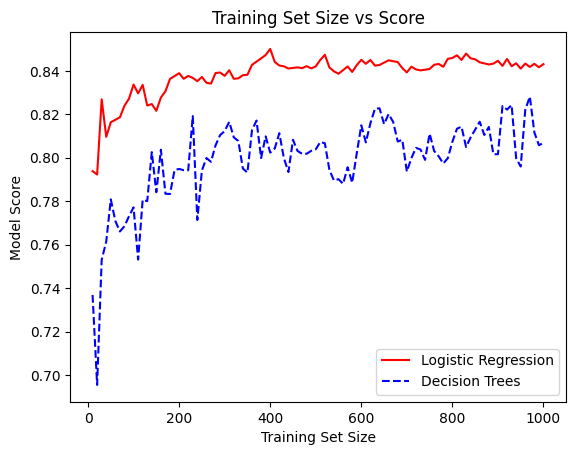

In [14]:
def get_train_size_scores(features, labels, train_sizes):
    """
    Create and train models for each of the specified training set sizes,
    and return the resulting scores for Logistic Regression and Decision Trees.

    Returns:
        A list of scores (one for each training set size) for a trained Logistic Regression model.
        A list of scores (one for each training set size) for a trained Decision Trees model.
    """

    lr_score = list()
    dt_score = list() 
    for tmp_size in (train_sizes):

        X_train, x_test, Y_train, y_test = split_data(features, labels, tmp_size)

        lr_model = get_trained_lr(X_train, Y_train)
        dt_model = get_trained_dt(X_train, Y_train)

        lr_score.append(lr_model.score(x_test, y_test))
        dt_score.append(dt_model.score(x_test, y_test))


    return lr_score, dt_score
    # return NotImplemented, NotImplemented

train_sizes = list(range(10, 1010, 10))
lr_scores, dt_scores = get_train_size_scores(communities_features, communities_labels, train_sizes)

if (lr_scores is NotImplemented):
    print("Function not implemented, using fake data!")
    lr_scores = [random.random() for _ in range(len(train_sizes))]
    dt_scores = [random.random() for _ in range(len(train_sizes))]

# Plot the results.
matplotlib.pyplot.title('Training Set Size vs Score')
matplotlib.pyplot.xlabel('Training Set Size')
matplotlib.pyplot.ylabel('Model Score')

matplotlib.pyplot.plot(train_sizes, lr_scores, color = 'red', label = 'Logistic Regression')
matplotlib.pyplot.plot(train_sizes, dt_scores, color = 'blue', label = 'Decision Trees', linestyle = 'dashed')
matplotlib.pyplot.legend()

matplotlib.pyplot.show()

Here you should be able to see that the scores for each model starts pretty low,
but then increases as more training data is added.
At some point we see that the model stops improving and the score more-or-less stays the same.

Note that the amount of data we have is relatively low by machine learning standards,
so that is why our plot is a bit bumpy.
The more data you get, the more precise view you can get on your performance.

Also note that in this specific problem, we only needed a few hundred points in our training set.
For other machine learning problems, it is not unusual to require orders of magnitude more training data.

<h3 style="color: darkorange; font-size: x-large";>★ Task 4.B</h3>

In this task, we will explore the trade-off of model complexity.
Part of the process for picking what machine learning model/algorithm to use also involves deciding how "complex" to make our model.
Complexity can be a difficulty topic for beginners to quantify, but we can roughly think about complex models as having a lot of parameters/components.
For example, we can say that a very "simple" decision tree for our data has one non-leaf (decision) node with two children: 1 and 0.
Whereas a "complex" decision tree and have hundreds of decision nodes with dozens of leafs.
Complex models can be nice, because they can capture natural complexities and nuances in our data.
However, complex models can also be bad because instead of learning general patterns then may learn patterns that are specific to our training data
(and not all general data).

Complete the following function which will train a Decision Tree model on the passed in dataset with each of the specified max depths.

This function should return two lists that contain the accuracy (via the `score()` method) of each model for each training set size.
Ensure that you use the test (not train) data to score each model.

This function should return two lists that contain the accuracy (via the `score()` method) of each instance of the Decision Tree model with each corresponding max depth.
The **first list** should contain the result of scoring the model on **training data**.
The **second list** should contain the result of scoring the model on **test data**.
(If you are new to ML, the first list may seem unusual.
Why score a model on data it was just trained on?
This will hopefully make more sense when you see the resulting data plotted.)

Make sure to use the functions that you have already implemented.

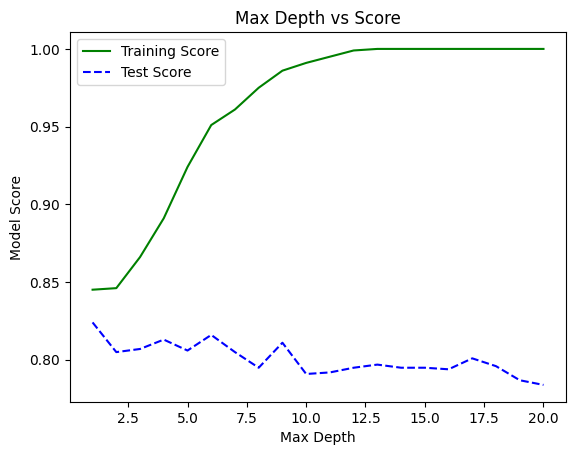

In [15]:
def get_dt_max_depth_scores(features, labels, max_depths, train_size = 1000):
    """
    Create and train Decision Tree models for each of the specified max depths,
    and return the resulting scores (on train and test data).

    Returns:
        A list of scores (one for each max depth) for a trained Decision Trees model, scored on the training data.
        A list of scores (one for each max depth) for a trained Decision Trees model, scored on the test data.
    """

    train_scores = list()
    test_scores = list()
    for tmp_depth in max_depths:
        X_train, x_test, Y_train, y_test = split_data(features, labels, train_size)

        dt_model = get_trained_dt(X_train, Y_train, tmp_depth)

        train_scores.append(dt_model.score(X_train, Y_train))
        test_scores.append(dt_model.score(x_test, y_test))

    return train_scores, test_scores
    # return NotImplemented, NotImplemented

max_depths = list(range(1, 21))
train_scores, test_scores = get_dt_max_depth_scores(communities_features, communities_labels, max_depths)

if (train_scores is NotImplemented):
    print("Function not implemented, using fake data!")
    train_scores = [random.random() for _ in range(len(max_depths))]
    test_scores = [random.random() for _ in range(len(max_depths))]

# Plot the results.
matplotlib.pyplot.title('Max Depth vs Score')
matplotlib.pyplot.xlabel('Max Depth')
matplotlib.pyplot.ylabel('Model Score')

matplotlib.pyplot.plot(max_depths, train_scores, color = 'green', label = 'Training Score')
matplotlib.pyplot.plot(max_depths, test_scores, color = 'blue', label = 'Test Score', linestyle = 'dashed')
matplotlib.pyplot.legend()

matplotlib.pyplot.show()

There is a few very interesting things going on in this graph.
If we look at the test score (which we looked at in Task 4.A),
we can see that the score starts lower, reaches its peak, but then starts to actually get worse.
So our model actually gets worse if we make it too complex.

To see why out model gets worse, we can look at the green line: the score on the training data.
Looking at this line, we can see that it just increases as the model becomes more complex until it plateaus off at 100%.
What we are actually looking at is the model becoming so complex that it learns all the tiny details that are present in the training set,
but that are not specific to all the data.
Like if we wanted to draw conclusions about all undergraduate students just by looking at the students in this course.
Because the sample is not necessarily representative of all undergraduate students,
if we get too complex we may learn patterns that do not hold for all undergraduate students.

<h3 style="color: green; font-size: x-large";>♦ Group Break</h3>

Take a moment to discuss trade-offs made in machine learning.

Some potential things to discuss with your group:
 - Can you always choose the correct point for a trade-off (e.g., can you always choose the correct number of data points to use for training)?
 - In Task 4.A, is there anything we could do to smooth out our plot with the data we have?
     - Here we are not looking just to visually smooth our our plot by taking a different number of samples, but to actually improve the quality of our results.
 - Is it always bad for training error to go to zero (or training accuracy to go to 100%)?
 - What would it take to get a representative sample of undergraduate students?

## Part 5: Observing Error Disparities

We we train our model on some dataset,
we say that the trained model has some error associated with it.
So far in this lab, we have been using accuracy (from the `score()` method),
but we can convert this into an error by subtracting that from $ 1.0 $.
For example, a score of $ 0.75 $ is an error of $ 1.0 - 0.75 = 0.25 $.
When doing more formal work we may use a more robust error metric,
but there will always be a link between a score you are trying to maximize (e.g., we want a high accuracy)
and an error/loss that you want to minimize.

Sometimes it can be useful to see if our model is performing the same on different populations,
or groups in our dataset.
We can compute the disparity between these two groups by taking the absolute value of the difference in error between the same model tested on the different groups.
For example if we had an image classifier,
it could be useful to see if our model performs equally well for dogs and cats.
If we see a disparity, then that may tell us we need more training images of the respective animal.

Let's start looking for disparities in our data by creating the groups that we will look for disparities between.

<h3 style="color: darkorange; font-size: x-large";>★ Task 5.A</h3>

Complete the following function which will take in a DataFrame, column name, and threshold.
The function will then return the data split into two groups based on the value in the specified column in relation to the threshold.

The passed in DataFrame should not be modified.

In [16]:
def split_on_column(frame, column_name, threshold):
    """
    Take in a DataFrame, column name, and threshold;
    and return two DataFrames that are split based on the specified column's value.
    
    Returns:
        A Pandas DataFrame that contains all rows where the specified column are less than the threshold.
        A Pandas DataFrame that contains all rows where the specified column are greater than or equal to the threshold.
    """

    tmp_Datafram = frame.copy()

    lessThan = tmp_Datafram[tmp_Datafram[column_name] < threshold]
    greaterThan = tmp_Datafram[tmp_Datafram[column_name] >= threshold]
    
    return lessThan, greaterThan
    # return NotImplemented, NotImplemented

under_group, over_group = split_on_column(communities_data, 'population', 0.05)

if (under_group is NotImplemented):
    print("Function not implemented.")
else:
    print("Size of under group: '%d'." % (len(under_group)))
    print("Size of over group: '%d'." % (len(over_group)))

Size of under group: '1424'.
Size of over group: '570'.


Now that we can split data based on a column and threshold,
we can start to dive deep into our data and look for disparities.

<h3 style="color: darkorange; font-size: x-large";>★ Task 5.B</h3>

Complete the following function which will take in a DataFrame, column name, and label column name;
and compute the score disparity (using the `score()` method) between the two groups.

Include all the following notes when implementing your function:
 - When splitting **each** group into train and test sets, use a 50/50 split (half the data is train and half is test).
 - Use the mean value of the column as the threshold for splitting into groups.
     - The [Pandas Series.mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.mean.html) method should be very useful here.
 - Use your standard Logistic Regression classifier (`get_trained_lr()`).
 - You can assume that your groups will always contain multiple labels.
     - It is possible the splitting a group may result in one group only have one label represented.
     - scikit-learn will raise an exception in this case, just let that exception be raised.
 - Make sure to use the functions that you have already implemented.

In [17]:
def compute_disparity(frame, column_name, label_column_name):
    """
    Compute the disparity for a specific column in a DataFrame.

    Returns:
        The disparity for the specified column.
    """
    _, tmp_series = slice_labels(frame, column_name)
    tmp_thresh = pandas.Series.mean(tmp_series)
    
    first_half, second_half = split_on_column(frame, column_name, tmp_thresh)

    f1_features, f1_labels = slice_labels(first_half, label_column_name)
    f2_features, f2_labels = slice_labels(second_half, label_column_name)
    first_data = split_data(f1_features, f1_labels, int(len(f1_features) / 2))
    second_data = split_data(f2_features, f2_labels, int(len(f2_features) / 2))

    first_lr = get_trained_lr(first_data[0], first_data[2]).score(first_data[1], first_data[3])
    second_lr = get_trained_lr(second_data[0], second_data[2]).score(second_data[1], second_data[3])

    return first_lr - second_lr
    # return NotImplemented

disparity = compute_disparity(communities_data, 'population', 'ViolentCrimesPerPop')
if (disparity is NotImplemented):
    print("Function not implemented.")
else:
    print("Disparity on the population column: %0.4f." % (disparity))

Disparity on the population column: 0.0354.


Now that we can compute the disparity for one column, we can compute it for all columns!

In [18]:
# Get all the column names.
feature_names = list(communities_features.columns)
disparities = []

# Compute the disparity for each column.
for feature_name in feature_names:
    try:
        disparity = compute_disparity(communities_data, feature_name, 'ViolentCrimesPerPop')
    except:
        disparity = numpy.nan
        
    if (disparity is NotImplemented):
        disparity = numpy.nan
        
    disparities.append(disparity)

# Merge the names and disparities into one list and sort by disparity (descending).
sorted_pairs = sorted(zip(disparities, feature_names), reverse = True)
    
print("Disparities:")
for (disparity, feature_name) in sorted_pairs:
    print("    %s -- %0.4f" % (feature_name, disparity))

Disparities:
    FemalePctDiv -- 0.1701
    racePctHisp -- 0.1694
    TotalPctDiv -- 0.1662
    PctIlleg -- 0.1655
    PctPersDenseHous -- 0.1550
    PctNotSpeakEnglWell -- 0.1532
    PctWOFullPlumb -- 0.1473
    PctHousNoPhone -- 0.1383
    MalePctDivorce -- 0.1381
    racepctblack -- 0.1365
    pctWPubAsst -- 0.1331
    PctHousLess3BR -- 0.1324
    PctNotHSGrad -- 0.1296
    PctLargHouseFam -- 0.1185
    PctLess9thGrade -- 0.1166
    PctUnemployed -- 0.1144
    PctRecImmig10 -- 0.1137
    NumImmig -- 0.1136
    PctLargHouseOccup -- 0.1080
    NumIlleg -- 0.0999
    agePct16t24 -- 0.0945
    PctRecImmig5 -- 0.0942
    PersPerRentOccHous -- 0.0930
    PctRecImmig8 -- 0.0910
    agePct12t29 -- 0.0879
    PctPopUnderPov -- 0.0859
    HousVacant -- 0.0772
    PctVacantBoarded -- 0.0769
    PctImmigRec10 -- 0.0762
    RacialMatchCommPol -- 0.0695
    MalePctNevMarr -- 0.0690
    PctRecentImmig -- 0.0686
    PctImmigRec8 -- 0.0663
    NumUnderPov -- 0.0647
    LemasSwFTFieldOps -- 0.0636
  

Here we can see all the columns in our dataset ordered by disparities.
Note that we don't know which direction the disparity goes: does it favor the under group or over group?
All we know is that a high disparity means that the two groups are not being treated the same.
Concerningly, we see a lot of high disparities on racial attributes.

### Error Rate Disparities

Instead of error disparities, let's compute two other types of errors that are of interest to us:
False Negative Disparity (also called False Negative Error Rate Balance)
and False Positive Disparity (also called False Positive Error Rate Balance).
Both of these disparities fall under the category of [Fairness Metrics](https://en.wikipedia.org/wiki/Fairness_(machine_learning)#Definitions_based_on_predicted_and_actual_outcomes).
These metrics will tell how about the gap in errors between two groups.
Essentially, how more likely are we to make types of mistakes for different groups of people.

To compute these metrics, we first need to be able to categorize each of our predictions outcomes.
To do this, we can use a tool called a [Confusion Matrix](https://en.wikipedia.org/wiki/Confusion_matrix) or "contingency table".
Confusion matrices allow us to categorize the results from a binary classifier into four different buckets that are more specific than just "right" and "wrong".

<center><img src="confusion-matrix.png"/></center>
<center style='font-size: small'>Image courtesy of <a href='https://en.wikipedia.org/wiki/Confusion_matrix'>Wikipedia</a> 2024-03-20.</center>

 - True Positives (TP) -- Also called a "hit". Represent instances that were correctly classified as positive/true.
 - True Negatives (TN) -- Also called a "correct rejection". Represent instances that were correctly classified as negative/false.
 - False Positives (FP) -- Also called a "Type I Error" or "false alarm". Represent instances that were incorrectly classified as positive/true.
 - False Negatives (FN) -- Also called a "Type II Error" or "miss". Represent instances that were incorrectly classified as negative/false.

Using these four values, we can compute all sorts of [useful statistics](https://en.wikipedia.org/wiki/Binary_classification#The_eight_basic_ratios),
including the False Negative Rate (FNR) and False Positive Rate (FPR) that we need for the above disparities.

| Metric              | Short Name | Definition                 |
| ------------------- | ---------- | -------------------------- |
| False Negative Rate | FNR        | $$ \frac{FN}{(TP + FN)} $$ |
| False Positive Rate | FPR        | $$ \frac{FP}{(TN + FP)} $$ |

<h3 style="color: darkorange; font-size: x-large";>★ Task 5.C</h3>

Complete the following function which will take in a DataFrame, column name, and label column name;
and compute the FNR and FPR disparities between the two groups.
This function has all the same semantics as `compute_disparity()`,
but returns two values based on FNR and FPR (respectively) instead of `score()`.

If any FNR/FPR computation will return in a division by zero,
use `nunmpy.nan` instead.

You may find the [sklearn.metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) function useful here.

In [50]:
import sklearn.metrics


def compute_confusion_disparity(frame, column_name, label_column_name):
    """
    Compute the FNR and FPR disparities for a specific column in a DataFrame.

    Returns:
        The FNR disparity for the specified column.
        The FPR disparity for the specified column.
    """
    
    _, tmp_series = slice_labels(frame, column_name)
    tmp_thresh = pandas.Series.mean(tmp_series)
    
    first_half, second_half = split_on_column(frame, column_name, tmp_thresh)

    f1_features, f1_labels = slice_labels(first_half, label_column_name)
    f2_features, f2_labels = slice_labels(second_half, label_column_name)
    first_data = split_data(f1_features, f1_labels, int(len(f1_features) / 2))
    second_data = split_data(f2_features, f2_labels, int(len(f2_features) / 2))
    
    first_pred = get_trained_lr(first_data[0], first_data[2]).predict(first_data[1])
    first_mat = sklearn.metrics.confusion_matrix(first_data[3], first_pred).ravel()
    
    second_pred = get_trained_lr(second_data[0], second_data[2]).predict(second_data[1])
    second_mat = sklearn.metrics.confusion_matrix(second_data[3], second_pred).ravel()

    # print(first_mat)
    # print(second_mat)
    tn, fp, fn, tp = first_mat + second_mat
    # print(tn, fp, fn, tp)

    fnr = 0
    fpr = 0
    if (tp + fn) == 0:
        fnr = numpy.nan
    else :
        fnr = fn / (tp + fn)

    if (tn + fp) == 0:
        fpr = numpy.nan
    else :
        fpr = fp / (tn + fp)    
    
    return fnr, fpr

fnr_disparity, fpr_disparity = compute_confusion_disparity(communities_data, 'population', 'ViolentCrimesPerPop')
if (fnr_disparity is NotImplemented):
    print("Function not implemented.")
else:
    print("FNR disparity on the population column: %0.4f." % (fnr_disparity))
    print("FPR disparity on the population column: %0.4f." % (fpr_disparity))


FNR disparity on the population column: 0.0000.
FPR disparity on the population column: 0.0000.


With these additional metrics, we can take a closer look at some of the concerning columns that have high disparities in our data.
Three of the four racial columns had high disparities, so let's take a look at those.

In [51]:
# Get all race* columns.
column_names = sorted([column_name for column_name in communities_features.columns if str(column_name).startswith('race')])

headers = [
    "column",
    "Score Disparity",
    "FNR Disparity",
    "FPR Disparity",
]

print("\t".join(headers))

# Compute the disparities for each column.
for column_name in column_names:
    score_disparity = compute_disparity(communities_data, column_name, 'ViolentCrimesPerPop')
    fnr_disparity, fpr_disparity = compute_confusion_disparity(communities_data, column_name, 'ViolentCrimesPerPop')
    
    if ((score_disparity is NotImplemented) or (fnr_disparity is NotImplemented)):
        print("Functions not implemented.")
        continue
        
    row = [column_name] + ["%0.4f" % (value) for value in [score_disparity, fnr_disparity, fpr_disparity]]
    print("\t".join(row))

column	Score Disparity	FNR Disparity	FPR Disparity
racePctAsian	0.0320	0.0000	0.0000
racePctHisp	0.1694	0.0000	0.0000
racePctWhite	-0.1836	0.0000	0.0000
racepctblack	0.1365	0.0000	0.0000


There is a lot of interesting things going on in these metrics that you will discuss with your group and class.
But for now, just look at the largest number (assuming your code is implemented correctly):
FNR Disparity for the "racePctWhite" column at 0.70.
Not only is this a huge disparity, but it reveals a troubling pattern in our data.
Areas with predominantly white residents are more likely to be **incorrectly** given the negative class ("low violent crime")
than areas that do not have predominantly white residents.

<h3 style="color: green; font-size: x-large";>♦ Group Break</h3>

Take a moment to discuss some of these metrics you have computed in this data,
and their ethical ramifications.

Some potential things to discuss with your group:
 - Does any of this actually matter?
     - So what if some stats are biased, does this actually affect people's lives?
     - In what ways can these skewed statistics impact people's lives?
 - Are the different type of classification errors (FP and FN) equivalent (equally bad)?
     - Are they equally harmful?
 - Why is there disparity in these racial statistics?

## Part 6: Short Response Questions

Please go to Canvas to enter your group's responses to the following questions.

#### Q1

When training a machine learning model with some dataset, what are some assumptions we are making about the data?
What are some things that it is important for us not to assume? Please give a few examples for each.

#### Q2

Why is it important to evaluate our model on data which was not used in training?
Why are there different error rates for train and test data?

#### Q3

In your own words, explain the results of your plot from Task 4.A.
Why does it make sense that these results occur?

#### Q4

In your own words, explain the results of your plot from Task 4.B.
Why does it make sense that these results occur?

#### Q5

In your own words, explain what the list of sorted disparities (after Task 5.B) means.
What are some possible implications of this model in terms of unfairness?

#### Q6

Look through the available features on the [dataset we used](https://archive.ics.uci.edu/dataset/183/communities+and+crime).
What are two attributes that you would expect to have high error disparity?
What are two attributes you would expect to have low error disparity?

#### Extra Credit

Play around with the data and generate some kind of plot that you find interesting.
Write a few sentences about your process, what you found, and what you think it suggests about the data.
This could be an evaluation of multiple model classes,
a statistical analysis of different features,
unsupervised analysis,
extending the investigation into error discrepancies,
or anything else you can think of.

Include an image of the plot, a description, and an analysis.